### The purpose of this notebook is to differentiate two different faces from different pictures from each other

### The first task would be to identify faces in different images

#### load in the required packages

In [17]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from moviepy.editor import *
import face_recognition
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


# read in the cascade file for drawing the rectangle over the co-ordinates in the faces using the haar package
haar_cascade_face = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

#### write a function to detect a face in an image, and draw it out

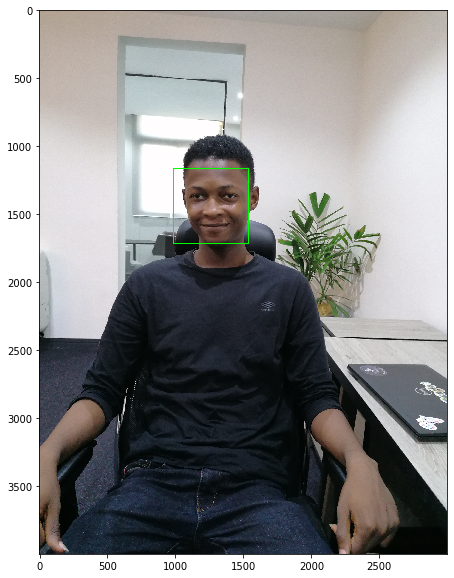

In [6]:
from PIL import ImageDraw
from PIL import Image

# a helper function to detect the faces in the image
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 10)

    return image_copy


# Create a function that draws the face detected in an Image for face_recognition
def draw_face(img_path, lib="haar", scaleFactor=1.34):
    """ Draw a box around the face depending on.
        
    Args:
        img_path (str): The Path to the image to compare.
        scale_factor (int): The scale factor for haar
        lib (str): ['normal', 'haar'] method for detecting the face, default is haar    
    """
    # if the user selects the normal library use the inbuilt one with openCV
    if lib == "normal":
        #get the image and copy it too avoid writing to the priginal image
        img = Image.open(img_path)
        img_copy = img.copy()
        draw = ImageDraw.Draw(img_copy)
        
        #get the face locations from this copy of the image
        locations = face_recognition.face_locations(face_recognition.load_image_file(img_path))
        #draw a rectangle surrounding the images
        for location in locations:
            top, right, bottom, left = location
            draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0), width=10)
            plt.imshow(np.asarray(img_copy));
            
    # otherwise if the user selects the haar option fetch the haar-library from disk and use it to detect faces 
    else:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
        img = detect_faces(cascade, img, scaleFactor = scaleFactor)
        plt.imshow(img)
        
    #finally display the images
    plt.show()
    
# test it by deriving a face from my image
plt.figure(figsize = (10,10))
draw_face('alexander2.jpg')    

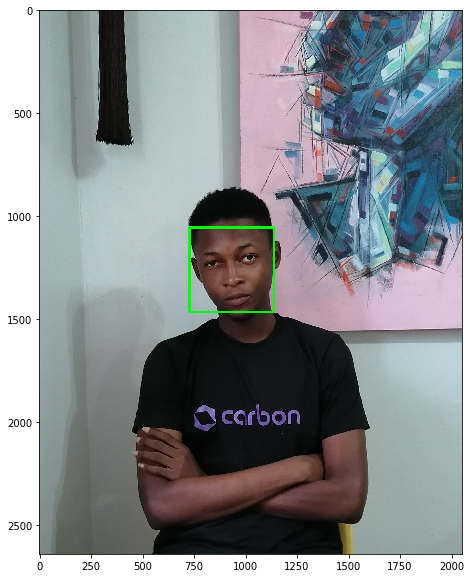

In [11]:
# try it again, on another of my images
plt.figure(figsize = (20,10))
draw_face('alexander.jpg')

#### As we can clearly see,it can detect my face from each respective image, we can then proceed to see if it can differentiate different images from one another

#### Load in three images and we then check if we can differentiate them from each other

In [49]:
# Images from disk of alex and glory
alexander = face_recognition.load_image_file("alexander.jpg")
glory = face_recognition.load_image_file("glory.jpg")

#new image of alexander to validate the database
new_alexander = face_recognition.load_image_file("alexander2.jpg")

#A random image to validate our findings
kelvin = face_recognition.load_image_file("kelvin.jpg")

#### display all three images

[]

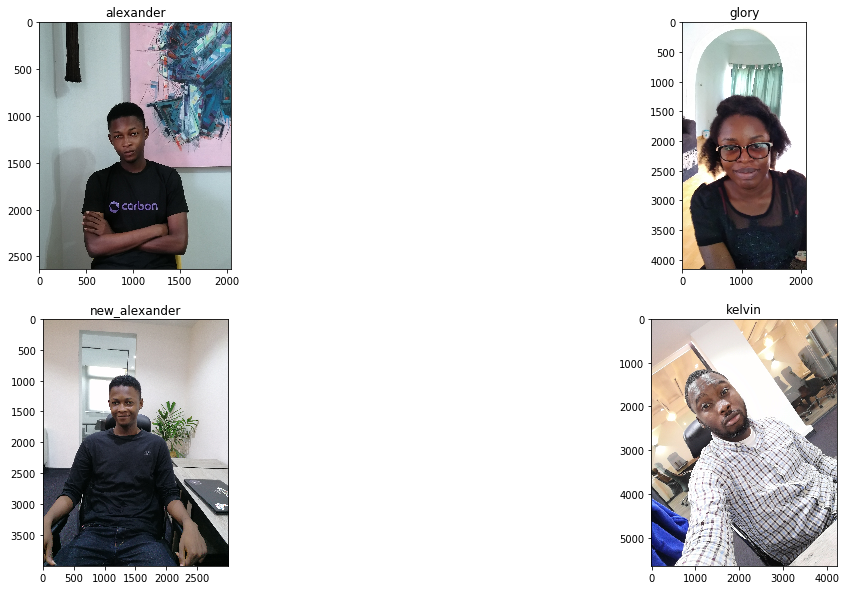

In [50]:
# Create 3x1 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure(figsize=(20,10))
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.imshow(alexander)
pl.title("alexander")

ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot([0,1])
pl.imshow(glory)
pl.title("glory")

ax = pl.subplot(gs[1, 0]) # row 1, span all columns
pl.plot([0,1])
pl.imshow(new_alexander)
pl.title("new_alexander")

ax = pl.subplot(gs[1, 1]) # row 1, span all columns
pl.imshow(kelvin)
pl.title("kelvin")

plt.plot()

### Firstly we try getting all the faces from the current images we have

In [59]:
# try getting all the images from all the pictures we have
try:
    alexander_face = face_recognition.face_encodings(alexander)[0]
    glory_face = face_recognition.face_encodings(glory)[0]
    kelvin_face = face_recognition.face_encodings(random_image)[0]
    alexander_face_two = face_recognition.face_encodings(new_alexander)[0]
    
    
# if there is no face in any image abort instead
except IndexError:
    print("Aborting")
    quit()


### compare all the 'known faces' in the array with "alexander_face_two

In [60]:

# keep all the known images in one array
known_faces = [
    new_alexander_face,
    glory_face,
    kelvin_face
    ]
unknown_face=alexander_face_two

# compare all the 'known faces' in the array with "alexander_face_two
# idealy, it should predict a true for the value in results[0]
# since it compares "alexander_face" with "alexander_face_two" and they are the same people(me)

results = face_recognition.compare_faces(known_faces, unknown_face)
#results contains 3 elements, each element compares the image in that index at known_faces array with the new image.
# it contains true at an index 'i' where known_faces[i] is equal to the other parameter passed to the compare_faces function

print("Is the new face a picture of Alexander? {}".format(results[0]))
print("Is the new face a picture of Glory? {}".format(results[1]))
print("Is the new face a picture of kelvin? {}".format(results[2]))
print("\n")
print("Is the new face a new person that we've never seen before that is not present in our 'known faces array'? {}".format(not True in results))

Is the new face a picture of Alexander? True
Is the new face a picture of Glory? False
Is the new face a picture of kelvin? False


Is the new face a new person that we've never seen before that is not present in our 'known faces array'? False


#### we can see that when we compare the faces in the 'known faces' array with a new image, the program is perfectly capable of identifying it among the known faces

In [61]:

# keep all the known images in one array
known_faces = [
    new_alexander_face,
    glory_face,
    ]
# in this case, we make kelvin our unknown face
unknown_face=kelvin_face

# compare all the 'known faces' in the array with "alexander_face_two
# idealy, it should predict a true for the value in results[0]
# since it compares "alexander_face" with "alexander_face_two" and they are the same people(me)

results = face_recognition.compare_faces(known_faces, unknown_face)
#results contains 3 elements, each element compares the image in that index at known_faces array with the new image.
# it contains true at an index 'i' where known_faces[i] is equal to the other parameter passed to the compare_faces function

print("Is the new face a picture of Alexander? {}".format(results[0]))
print("Is the new face a picture of Glory? {}".format(results[1]))
print("\n")
print("Is the new face a new person that we've never seen before that is not present in our 'known faces array'? {}".format(not True in results))

Is the new face a picture of Alexander? False
Is the new face a picture of Glory? False


Is the new face a new person that we've never seen before that is not present in our 'known faces array'? True


### In this program, i have been able to sucessfully write a program to identify if one face is among a set of faces, which could be used to label faces in a database as to check if they are the same people or not. The application for this could be to tag all the people in an album based on the ir identity, then organise all the people tagged as the same into different folders.

#### Thus the application of this code could be for tagging and sorting of very large photos, based on the people in it